In [2]:
import pandas as pd
import datetime

# Create dataframe using csv file downloaded from data.gov
cta_ridership_df = pd.read_csv("CTA_-_Ridership_-__L__Station_Entries_-_Monthly_Day-Type_Averages___Totals.csv")
cta_ridership_df.head()


,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
0,40900,Howard,01/01/2001,6233.9,3814.5,2408.6,164447
1,41190,Jarvis,01/01/2001,1489.1,1054.0,718.0,40567
2,40100,Morse,01/01/2001,4412.5,3064.5,2087.8,119772
3,41300,Loyola,01/01/2001,4664.5,3156.0,1952.8,125008
4,40760,Granville,01/01/2001,3109.8,2126.0,1453.8,84189


In [3]:
# Convert the month_beginning from string to date
cta_ridership_df["month_beginning"] = pd.to_datetime(cta_ridership_df["month_beginning"])
cta_ridership_df.head()

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
0,40900,Howard,2001-01-01,6233.9,3814.5,2408.6,164447
1,41190,Jarvis,2001-01-01,1489.1,1054.0,718.0,40567
2,40100,Morse,2001-01-01,4412.5,3064.5,2087.8,119772
3,41300,Loyola,2001-01-01,4664.5,3156.0,1952.8,125008
4,40760,Granville,2001-01-01,3109.8,2126.0,1453.8,84189


In [4]:
# Reducing Dataframe down to the years from 2013-2023

x = datetime.datetime(2013, 1,1)
y= datetime.datetime(2023,12,1)


cta_ridership_df = cta_ridership_df.loc[(cta_ridership_df["month_beginning"]>=x) & (cta_ridership_df["month_beginning"]<=y),:]
cta_ridership_df.head()

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
20414,40900,Howard,2013-01-01,6134.1,4252.0,2928.6,166602
20415,41190,Jarvis,2013-01-01,1295.2,1124.8,739.4,36690
20416,40100,Morse,2013-01-01,4443.5,3314.8,2462.6,123329
20417,41300,Loyola,2013-01-01,4641.5,3653.3,2459.0,129021
20418,40760,Granville,2013-01-01,3674.0,2830.8,1991.6,102108


In [5]:
# Removing any of the columns that have 0 data
cta_ridership_clean = cta_ridership_df.loc[(cta_ridership_df[["avg_weekday_rides", "avg_saturday_rides", "avg_sunday-holiday_rides"]] !=0).all(axis=1)]
counts = cta_ridership_clean["stationame"].value_counts()
# Finding all of the stations with complete datasets for all months from 2013 to 2023 (132 lines of data), saving it to a seperate csv file
counts
#counts.to_csv('name.csv',index=True)


stationame
Wilson               133
Howard               132
Central-Lake         132
Cicero-Lake          132
Pulaski-Lake         132
                    ... 
Lawrence             101
Berwyn               101
Washington/Wabash     76
Randolph/Wabash       57
Madison/Wabash        27
Name: count, Length: 145, dtype: int64

In [6]:
# Creating a list of all the stations that have all months worth of data from 2013 to 2023 (132 lines of data) using the csv file
cta_line_names = pd.read_csv("name.csv")
cta_line_names = cta_line_names.loc[cta_line_names["count"] == 132,:]

cta_lines = cta_line_names["stationame"].to_list()
cta_lines

['Howard',
 'Central-Lake',
 'Cicero-Lake',
 'Pulaski-Lake',
 'Conservatory',
 'Kedzie-Lake',
 'California-Lake',
 'Ashland-Lake',
 'Morgan-Lake',
 'Clinton-Lake',
 '35-Bronzeville-IIT',
 'Indiana',
 '43rd',
 '47th-South Elevated',
 '51st',
 'Garfield-South Elevated',
 'Laramie',
 'Austin-Lake',
 'East 63rd-Cottage Grove',
 'Kedzie-Cermak',
 'Forest Park',
 'Polk',
 '18th',
 'Damen-Cermak',
 'Western-Cermak',
 'California-Cermak',
 'Central Park',
 'Ridgeland',
 'Pulaski-Cermak',
 'Kostner',
 'Cicero-Cermak',
 '54th/Cermak',
 'Harlem-Lake',
 'Oak Park-Lake',
 'King Drive',
 'Halsted/63rd',
 'Jarvis',
 'Halsted-Orange',
 'Midway Airport',
 'Pulaski-Orange',
 'Kedzie-Midway',
 'Western-Orange',
 '35th/Archer',
 'Ashland-Orange',
 'Washington/Wells',
 'Ashland/63rd',
 'Quincy/Wells',
 'LaSalle/Van Buren',
 'Library',
 'Adams/Wabash',
 'State/Lake',
 'Clark/Lake',
 'Merchandise Mart',
 'Chicago/Franklin',
 'Sedgwick',
 'Armitage',
 'Diversey',
 'Wellington',
 'Southport',
 'Paulina',
 'Add

In [7]:
# Using the list of CTA lines with complete data to created a cleaned up dataframe (124 stations)
cta_ridership_cleaned_df = cta_ridership_clean[cta_ridership_clean["stationame"].isin(cta_lines)]
# Rename columns
cta_ridership_cleaned_df = cta_ridership_cleaned_df.rename(columns={'station_id': 'Station ID', 'stationame': 'Station Name', 'month_beginning':'Month', "avg_weekday_rides": "Average Weekday Rides", 'avg_saturday_rides': "Average Saturday Rides",
                                                              'avg_sunday-holiday_rides':'Average Sunday/Holiday Rides', 'monthtotal': 'Monthly Total'})

print(f"There are {cta_ridership_cleaned_df["Station Name"].nunique()} 'L' train stations in the dataframe")
cta_ridership_cleaned_df

There are 124 'L' train stations in the dataframe


,Station ID,Station Name,Month,Average Weekday Rides,Average Saturday Rides,Average Sunday/Holiday Rides,Monthly Total
20414,40900,Howard,2013-01-01,6134.1,4252.0,2928.6,166602
20415,41190,Jarvis,2013-01-01,1295.2,1124.8,739.4,36690
20416,40100,Morse,2013-01-01,4443.5,3314.8,2462.6,123329
20417,41300,Loyola,2013-01-01,4641.5,3653.3,2459.0,129021
20418,40760,Granville,2013-01-01,3674.0,2830.8,1991.6,102108
...,...,...,...,...,...,...,...
39333,40160,LaSalle/Van Buren,2023-12-01,1368.2,417.6,267.8,31058
39334,40850,Library,2023-12-01,1937.4,1301.0,910.2,50713
39335,40680,Adams/Wabash,2023-12-01,3247.4,1840.8,1241.2,81599
39337,40260,State/Lake,2023-12-01,6391.6,5268.2,3342.7,174229


In [8]:
# Yearly rider totals per year
yearly_riders = cta_ridership_cleaned_df.groupby(cta_ridership_cleaned_df['Month'].dt.year)['Monthly Total'].sum()
yearly_riders.tolist()

[164461937,
 165252994,
 168765483,
 166968845,
 161205233,
 158063036,
 153166444,
 52082546,
 56206845,
 75293773,
 86561952]

In [9]:
import matplotlib.pyplot as plt


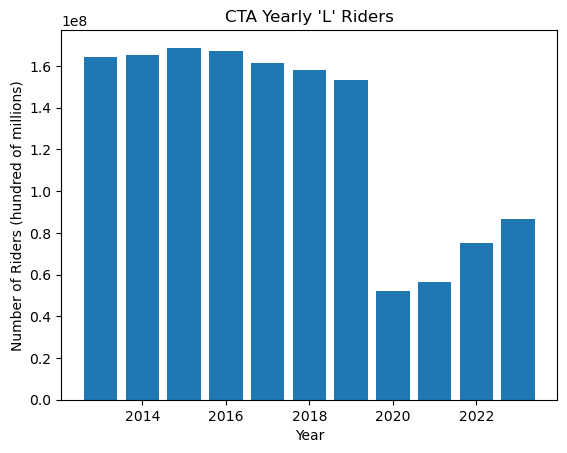

In [11]:
# Graph the yearly rider totals for all stations by year
years = [2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
plt.bar(years, yearly_riders)
plt.xlabel("Year")
plt.ylabel("Number of Riders (hundred of millions)")
plt.title("CTA Yearly 'L' Riders")
plt.savefig('yearly.png')
plt.show()

In [70]:
#Busiest stations on monthly average over previous 11 year period
cta_ridership_by_station = cta_ridership_cleaned_df.groupby(cta_ridership_cleaned_df['Station Name'])['Monthly Total'].mean()
cta_ridership_by_station.sort_values(ascending=False)


Station Name
Lake/State            423335.977273
Clark/Lake            370432.878788
Chicago/State         321932.803030
Belmont-North Main    271690.083333
O'Hare Airport        265775.045455
                          ...      
Central-Evanston       17243.303030
South Boulevard        16044.742424
Halsted/63rd           15541.878788
King Drive             12575.848485
Kostner                10711.696970
Name: Monthly Total, Length: 124, dtype: float64

In [71]:
# Created a new dataframe to change date format to just the year and get the average monthly ridership of each station by year
cta_ridership_cleaned_df["Year"]=""
cta_ridership_cleaned_df["Year"]=(cta_ridership_cleaned_df['Month'].dt.year)
cta_ridership_by_station_yearly = cta_ridership_cleaned_df.groupby(["Station Name","Year"], as_index=False)["Monthly Total"].mean()
cta_ridership_by_station_yearly


,Station Name,Year,Monthly Total
0,18th,2013,49887.833333
1,18th,2014,53074.750000
2,18th,2015,54716.416667
3,18th,2016,51142.916667
4,18th,2017,49022.000000
...,...,...,...
1359,Western/Milwaukee,2019,137452.333333
1360,Western/Milwaukee,2020,42463.833333
1361,Western/Milwaukee,2021,44482.333333
1362,Western/Milwaukee,2022,63325.916667


In [72]:
# Created dataframes by year to merge into one dataframe
cta_ridership_by_station_2013 = cta_ridership_by_station_yearly[(cta_ridership_by_station_yearly["Year"]==2013)]
cta_ridership_by_station_2013 = cta_ridership_by_station_2013.drop("Year", axis=1)
cta_ridership_by_station_2013 = cta_ridership_by_station_2013.rename(columns={'Monthly Total':'2013'})

cta_ridership_by_station_2014 = cta_ridership_by_station_yearly[(cta_ridership_by_station_yearly["Year"]==2014)]
cta_ridership_by_station_2014 = cta_ridership_by_station_2014.drop("Year", axis=1)
cta_ridership_by_station_2014 = cta_ridership_by_station_2014.rename(columns={'Monthly Total':'2014'})

cta_ridership_by_station_2015 = cta_ridership_by_station_yearly[(cta_ridership_by_station_yearly["Year"]==2015)]
cta_ridership_by_station_2015 = cta_ridership_by_station_2015.drop("Year", axis=1)
cta_ridership_by_station_2015 = cta_ridership_by_station_2015.rename(columns={'Monthly Total':'2015'})

cta_ridership_by_station_2016 = cta_ridership_by_station_yearly[(cta_ridership_by_station_yearly["Year"]==2016)]
cta_ridership_by_station_2016 = cta_ridership_by_station_2016.drop("Year", axis=1)
cta_ridership_by_station_2016 = cta_ridership_by_station_2016.rename(columns={'Monthly Total':'2016'})

cta_ridership_by_station_2017 = cta_ridership_by_station_yearly[(cta_ridership_by_station_yearly["Year"]==2017)]
cta_ridership_by_station_2017 = cta_ridership_by_station_2017.drop("Year", axis=1)
cta_ridership_by_station_2017 = cta_ridership_by_station_2017.rename(columns={'Monthly Total':'2017'})

cta_ridership_by_station_2018 = cta_ridership_by_station_yearly[(cta_ridership_by_station_yearly["Year"]==2018)]
cta_ridership_by_station_2018 = cta_ridership_by_station_2018.drop("Year", axis=1)
cta_ridership_by_station_2018 = cta_ridership_by_station_2018.rename(columns={'Monthly Total':'2018'})

cta_ridership_by_station_2019 = cta_ridership_by_station_yearly[(cta_ridership_by_station_yearly["Year"]==2019)]
cta_ridership_by_station_2019 = cta_ridership_by_station_2019.drop("Year", axis=1)
cta_ridership_by_station_2019 = cta_ridership_by_station_2019.rename(columns={'Monthly Total':'2019'})

cta_ridership_by_station_2020 = cta_ridership_by_station_yearly[(cta_ridership_by_station_yearly["Year"]==2020)]
cta_ridership_by_station_2020 = cta_ridership_by_station_2020.drop("Year", axis=1)
cta_ridership_by_station_2020 = cta_ridership_by_station_2020.rename(columns={'Monthly Total':'2020'})

cta_ridership_by_station_2021 = cta_ridership_by_station_yearly[(cta_ridership_by_station_yearly["Year"]==2021)]
cta_ridership_by_station_2021 = cta_ridership_by_station_2021.drop("Year", axis=1)
cta_ridership_by_station_2021 = cta_ridership_by_station_2021.rename(columns={'Monthly Total':'2021'})

cta_ridership_by_station_2022 = cta_ridership_by_station_yearly[(cta_ridership_by_station_yearly["Year"]==2022)]
cta_ridership_by_station_2022 = cta_ridership_by_station_2022.drop("Year", axis=1)
cta_ridership_by_station_2022 = cta_ridership_by_station_2022.rename(columns={'Monthly Total':'2022'})

cta_ridership_by_station_2023 = cta_ridership_by_station_yearly[(cta_ridership_by_station_yearly["Year"]==2023)]
cta_ridership_by_station_2023 = cta_ridership_by_station_2023.drop("Year", axis=1)
cta_ridership_by_station_2023 = cta_ridership_by_station_2023.rename(columns={'Monthly Total':'2023'})

In [73]:
import functools

# Merge all of the dataframes together to get a list of stations by average by year

cta_stations = pd.DataFrame({"Station Name":cta_lines})

data_frames = [cta_stations, cta_ridership_by_station_2013,cta_ridership_by_station_2014,cta_ridership_by_station_2015,cta_ridership_by_station_2016,cta_ridership_by_station_2017,
                                               cta_ridership_by_station_2018,cta_ridership_by_station_2019, cta_ridership_by_station_2020,cta_ridership_by_station_2021,cta_ridership_by_station_2022,
                                                cta_ridership_by_station_2023]

cta_merged_yearly_station_avg = functools.reduce(lambda  left,right: pd.merge(left,right,on=['Station Name'],
                                            how='outer'), data_frames)
cta_merged_yearly_station_avg



,Station Name,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,18th,49887.833333,53074.750000,54716.416667,51142.916667,49022.000000,47351.666667,45840.750000,18823.166667,23384.666667,29770.000000,33921.583333
1,35-Bronzeville-IIT,102505.333333,58558.083333,55515.333333,48344.000000,45200.666667,43881.166667,40056.583333,15499.166667,18095.416667,22657.916667,25292.916667
2,35th/Archer,78015.916667,78055.416667,81924.833333,82038.000000,79682.833333,76562.250000,74691.000000,27188.250000,29366.583333,39771.416667,44451.166667
3,43rd,34358.166667,30273.583333,29523.750000,27791.583333,26519.166667,25919.083333,23784.666667,10987.250000,9655.416667,11665.666667,13270.416667
4,47th-South Elevated,47180.583333,38280.166667,36900.333333,32848.250000,31159.833333,29060.666667,26248.083333,12200.083333,11134.000000,12880.250000,14252.750000
...,...,...,...,...,...,...,...,...,...,...,...,...
119,Western-Brown,113552.500000,114596.583333,111274.500000,109692.500000,107106.166667,105564.166667,104838.333333,36406.583333,36965.916667,49170.166667,57957.666667
120,Western-Cermak,30700.750000,32736.000000,33558.416667,30849.166667,30080.083333,29467.166667,27621.166667,13735.833333,15680.083333,18636.750000,21518.000000
121,Western-Forest Park,44995.916667,46404.833333,46312.083333,44517.916667,42763.083333,41455.500000,41212.500000,16810.083333,15966.250000,19764.666667,15779.916667
122,Western-Orange,96236.416667,107815.083333,111249.583333,100180.250000,96592.250000,93282.916667,90768.666667,38872.500000,40000.333333,52297.666667,59677.416667


In [74]:
# Create new columns for average over 11 years, average for the pre-COVID years, average for the post-COVID years, and created bins to categorize stations by ridership average

cta_merged_yearly_station_avg["Average"] = cta_merged_yearly_station_avg.mean(numeric_only=True, axis=1)
cta_merged_yearly_station_avg["Pre-COVID"]= cta_merged_yearly_station_avg[['2013','2014','2015','2016','2017','2018','2019']].mean(axis=1)
cta_merged_yearly_station_avg["Post-COVID"]= cta_merged_yearly_station_avg[['2020','2021','2022','2023']].mean(axis=1)
cta_merged_yearly_station_avg["Ridership Volume Pre-COVID"] = pd.cut(cta_merged_yearly_station_avg["Pre-COVID"], bins=[0,50000,100000,200000,300000,float('Inf')],labels=['Low','Average','Above Average','Heavy','Very Heavy'])
cta_merged_yearly_station_avg["Ridership Volume Post-COVID"] = pd.cut(cta_merged_yearly_station_avg["Post-COVID"], bins=[0,50000,100000,200000,300000,float('Inf')],labels=['Low','Average','Above Average','Heavy','Very Heavy'])

In [75]:
# Sorting stations by average ridership from highest to lowest
cta_merged_yearly_station_avg.sort_values(by="Average", ascending=False,inplace=True)
cta_merged_yearly_station_avg

,Station Name,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Average,Pre-COVID,Post-COVID,Ridership Volume Pre-COVID,Ridership Volume Post-COVID
77,Lake/State,482727.750000,544743.500000,584281.000000,584492.083333,554200.083333,550408.500000,537569.916667,158578.750000,172149.250000,229098.750000,258446.166667,423335.977273,548346.119048,204568.229167,Very Heavy,Heavy
33,Clark/Lake,461963.166667,464436.250000,499755.750000,497722.166667,501877.750000,504026.250000,485897.250000,137389.500000,128423.833333,185064.833333,208204.916667,370432.878788,487954.083333,164770.770833,Very Heavy,Above Average
28,Chicago/State,426638.916667,438332.666667,438544.833333,438564.500000,408507.916667,388271.000000,375154.250000,117473.666667,138583.750000,173260.500000,197928.833333,321932.803030,416287.726190,156811.687500,Very Heavy,Above Average
18,Belmont-North Main,365639.083333,366489.000000,362779.666667,357854.666667,334198.916667,317793.750000,312097.083333,101730.916667,123475.666667,163262.083333,183270.083333,271690.083333,345264.595238,142934.687500,Very Heavy,Above Average
95,O'Hare Airport,290260.500000,293041.333333,337808.666667,333169.583333,327868.416667,331791.000000,317597.250000,112977.000000,149956.416667,197372.000000,231683.333333,265775.045455,318790.964286,172997.187500,Very Heavy,Above Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,Central-Evanston,22391.083333,22123.500000,21709.750000,21869.416667,20949.500000,20856.083333,20297.000000,8551.666667,9213.500000,10421.833333,11293.000000,17243.303030,21456.619048,9870.000000,Low,Low
111,South Boulevard,20823.833333,21615.750000,21218.166667,20410.750000,19587.083333,19673.000000,19401.000000,7576.833333,7170.666667,9181.333333,9833.750000,16044.742424,20389.940476,8440.645833,Low,Low
54,Halsted/63rd,39504.333333,22501.666667,20676.083333,17596.750000,16647.916667,14966.250000,13267.833333,6471.416667,5943.416667,6374.583333,7010.416667,15541.878788,20737.261905,6449.958333,Low,Low
73,King Drive,23510.833333,17811.833333,17598.666667,16229.833333,14709.916667,13562.083333,11594.250000,6224.083333,5362.333333,5250.916667,6479.583333,12575.848485,16431.059524,5829.229167,Low,Low


In [76]:
# Top 25 stations by average ridership over the last 11 years
cta_merged_yearly_station_avg.head(25)

,Station Name,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Average,Pre-COVID,Post-COVID,Ridership Volume Pre-COVID,Ridership Volume Post-COVID
77,Lake/State,482727.750000,544743.500000,584281.000000,584492.083333,554200.083333,550408.500000,537569.916667,158578.750000,172149.250000,229098.750000,258446.166667,423335.977273,548346.119048,204568.229167,Very Heavy,Heavy
33,Clark/Lake,461963.166667,464436.250000,499755.750000,497722.166667,501877.750000,504026.250000,485897.250000,137389.500000,128423.833333,185064.833333,208204.916667,370432.878788,487954.083333,164770.770833,Very Heavy,Above Average
28,Chicago/State,426638.916667,438332.666667,438544.833333,438564.500000,408507.916667,388271.000000,375154.250000,117473.666667,138583.750000,173260.500000,197928.833333,321932.803030,416287.726190,156811.687500,Very Heavy,Above Average
18,Belmont-North Main,365639.083333,366489.000000,362779.666667,357854.666667,334198.916667,317793.750000,312097.083333,101730.916667,123475.666667,163262.083333,183270.083333,271690.083333,345264.595238,142934.687500,Very Heavy,Above Average
95,O'Hare Airport,290260.500000,293041.333333,337808.666667,333169.583333,327868.416667,331791.000000,317597.250000,112977.000000,149956.416667,197372.000000,231683.333333,265775.045455,318790.964286,172997.187500,Very Heavy,Above Average
48,Fullerton,359510.166667,346242.416667,352810.833333,341563.250000,319185.750000,312609.666667,309962.000000,98569.250000,112903.333333,169252.000000,196520.333333,265375.363636,334554.869048,144311.229167,Very Heavy,Above Average
51,Grand/State,319141.416667,348737.000000,362469.166667,358557.166667,338123.500000,323870.833333,315002.583333,84135.416667,114528.750000,146350.750000,167580.583333,261681.560606,337985.952381,128148.875000,Very Heavy,Above Average
107,Roosevelt,332673.750000,328481.750000,318001.416667,317195.583333,311318.500000,296247.250000,288909.166667,109493.750000,126581.166667,162153.083333,188496.833333,252686.568182,313261.059524,146681.208333,Very Heavy,Above Average
116,Washington/Dearborn,264658.583333,285983.250000,302804.833333,317079.583333,326896.583333,335987.583333,348079.000000,99664.500000,108948.833333,153894.833333,165623.500000,246329.189394,311641.345238,132032.916667,Very Heavy,Above Average
113,State/Lake,253630.000000,257683.833333,274649.500000,262233.416667,275541.166667,314987.500000,315265.583333,97020.916667,114588.500000,162302.916667,195452.666667,229396.000000,279141.571429,142341.250000,Heavy,Above Average


In [77]:
# Bottom 25 stations by average ridership over the last 11 years
cta_merged_yearly_station_avg.tail(25)

,Station Name,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Average,Pre-COVID,Post-COVID,Ridership Volume Pre-COVID,Ridership Volume Post-COVID
15,Ashland/63rd,61556.083333,39944.750000,36899.250000,31391.333333,30569.250000,28569.250000,25157.500000,12567.500000,11434.333333,12162.833333,13701.000000,27632.098485,36298.202381,12466.416667,Low,Low
78,Laramie,37572.666667,38793.666667,38003.666667,36341.916667,31055.583333,30331.250000,28093.416667,14120.166667,12292.083333,14065.666667,17053.833333,27065.810606,34313.166667,14382.937500,Low,Low
4,47th-South Elevated,47180.583333,38280.166667,36900.333333,32848.250000,31159.833333,29060.666667,26248.083333,12200.083333,11134.000000,12880.250000,14252.750000,26558.636364,34525.416667,12616.770833,Low,Low
23,Central Park,34022.416667,34812.500000,35472.500000,32007.250000,30117.500000,30165.666667,28595.500000,13769.916667,13443.583333,16037.583333,18328.000000,26070.219697,32170.476190,15394.770833,Low,Low
120,Western-Cermak,30700.750000,32736.000000,33558.416667,30849.166667,30080.083333,29467.166667,27621.166667,13735.833333,15680.083333,18636.750000,21518.000000,25871.219697,30716.107143,17392.666667,Low,Low
105,Ridgeland,33079.000000,32608.250000,32783.250000,32495.333333,34264.166667,33585.500000,32232.666667,10223.583333,9850.416667,13326.750000,16687.750000,25557.878788,33006.880952,12522.125000,Low,Low
100,Pulaski-Cermak,32399.500000,34498.500000,34298.833333,30751.166667,28407.166667,27705.166667,27368.500000,14587.000000,14066.750000,16899.000000,19596.000000,25507.053030,30775.547619,16287.187500,Low,Low
44,East 63rd-Cottage Grove,47857.833333,36576.750000,34611.916667,31040.583333,29737.166667,26627.750000,25239.083333,11498.833333,11031.000000,10938.000000,14911.000000,25460.901515,33098.726190,12094.708333,Low,Low
83,Main,31836.666667,33620.083333,33243.916667,32627.583333,32088.666667,30963.583333,29851.833333,10501.416667,11015.833333,13144.083333,14953.000000,24895.151515,32033.190476,12403.583333,Low,Low
68,Kedzie-Cermak,28674.000000,30099.333333,31594.000000,29532.833333,28749.500000,27748.416667,27090.750000,12370.416667,14584.916667,17825.000000,20158.500000,24402.515152,29069.833333,16234.708333,Low,Low


In [78]:
# Value counts by bin pre-COVID
cta_merged_yearly_station_avg['Ridership Volume Pre-COVID'].value_counts()

Ridership Volume Pre-COVID
Low              40
Average          37
Above Average    32
Very Heavy        9
Heavy             6
Name: count, dtype: int64

In [79]:
# Value counts by bin post_COVID
cta_merged_yearly_station_avg['Ridership Volume Post-COVID'].value_counts()

Ridership Volume Post-COVID
Low              85
Average          28
Above Average    10
Heavy             1
Very Heavy        0
Name: count, dtype: int64

In [80]:
print(f"Average ridership per station per month between 2013 and 2023 is {cta_merged_yearly_station_avg["Average"].mean()}")
print(f"Average ridership per station per month between 2013 and 2019 is {cta_merged_yearly_station_avg["Pre-COVID"].mean()}")
print(f"Average ridership per station per month between 2020 and 2023 is {cta_merged_yearly_station_avg["Post-COVID"].mean()}")
print(f"Median ridership per station per month between 2013 and 2023 is {cta_merged_yearly_station_avg["Average"].median()}")
print(f"Median ridership per station per month between 2013 and 2019 is {cta_merged_yearly_station_avg["Pre-COVID"].median()}")
print(f"Median ridership per station per month between 2020 and 2023 is {cta_merged_yearly_station_avg["Post-COVID"].median()}")

Average ridership per station per month between 2013 and 2023 is 86023.28250244379
Average ridership per station per month between 2013 and 2019 is 109243.85291858678
Average ridership per station per month between 2020 and 2023 is 45387.284274193546
Median ridership per station per month between 2013 and 2023 is 60514.13257575757
Median ridership per station per month between 2013 and 2019 is 75993.2261904762
Median ridership per station per month between 2020 and 2023 is 31909.552083333336


In [81]:
# Saving bins pre-COVID to list
cta_pre_covid = cta_merged_yearly_station_avg.groupby('Ridership Volume Pre-COVID')['Pre-COVID'].count()
cta_pre_covid_list = cta_pre_covid.to_list()

C:\Users\mrybi\AppData\Local\Temp\ipykernel_35460\2043529073.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cta_pre_covid = cta_merged_yearly_station_avg.groupby('Ridership Volume Pre-COVID')['Pre-COVID'].count()


In [82]:
# Saving bins post-COVID to list
cta_post_covid = cta_merged_yearly_station_avg.groupby('Ridership Volume Post-COVID')['Post-COVID'].count()
cta_post_covid_list = cta_post_covid.to_list()

C:\Users\mrybi\AppData\Local\Temp\ipykernel_35460\1046011523.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cta_post_covid = cta_merged_yearly_station_avg.groupby('Ridership Volume Post-COVID')['Post-COVID'].count()


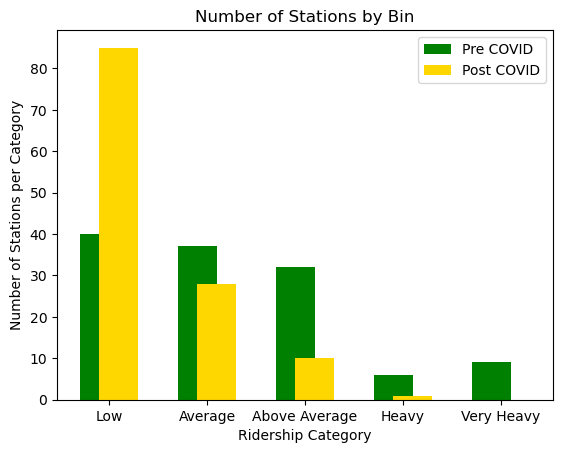

In [83]:
# Compare the number of pre-COVID vs post-COVID bin categories
import numpy as np
ridership_volume = ['Low','Average','Above Average','Heavy','Very Heavy']
X_axis = np.arange(len(ridership_volume))
plt.bar(X_axis -0.1, cta_pre_covid_list, 0.4, label = 'Pre COVID', color='green')
plt.bar(X_axis +0.1, cta_post_covid_list, 0.4, label= 'Post COVID', color='gold')
plt.xticks(X_axis, ridership_volume)
plt.xlabel('Ridership Category')
plt.ylabel('Number of Stations per Category')
plt.title('Number of Stations by Bin')
plt.legend()
plt.savefig('stations.png')

plt.show()

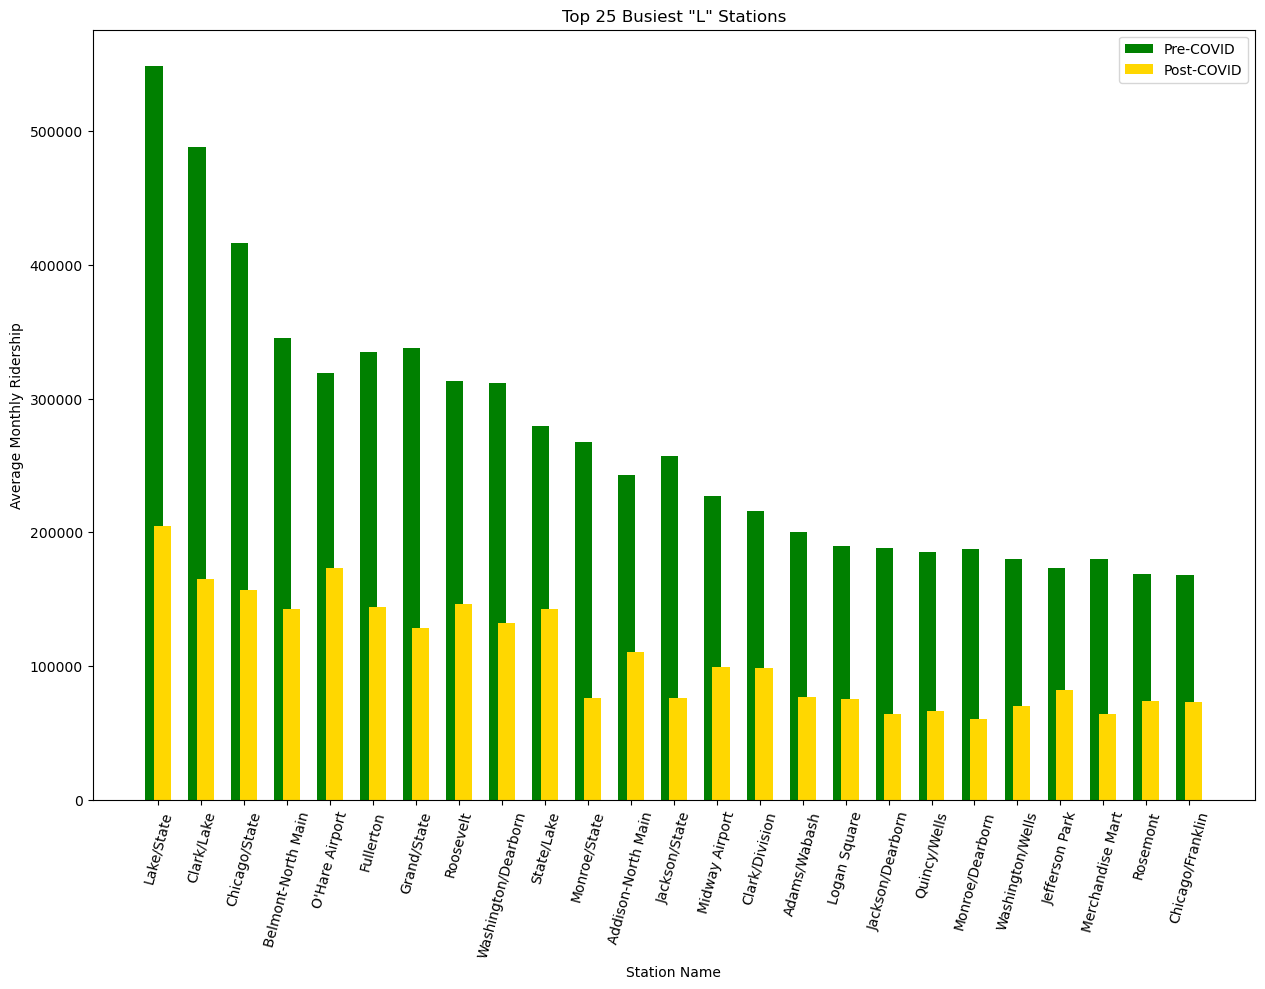

In [86]:
# Top 25 busiest stations
busiest_stations= cta_merged_yearly_station_avg.head(25)
plt.figure(figsize=(15,10))
X_axis = np.arange(len(busiest_stations['Station Name']))
plt.bar(X_axis -0.1, busiest_stations['Pre-COVID'], 0.4, color='green', label='Pre-COVID')
plt.bar(X_axis +0.1, busiest_stations['Post-COVID'], 0.4, color='gold', label='Post-COVID')
plt.xticks(X_axis, busiest_stations['Station Name'], rotation=75)
plt.xlabel('Station Name')
plt.ylabel('Average Monthly Ridership')
plt.title('Top 25 Busiest "L" Stations')
plt.legend()
plt.savefig('top25.png')
plt.show()